In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import os 
import sys
sys.path.append('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning')

# from scripts.plot.statistics.Complete.Regression_Distribution import *

In [ ]:
data = 

Text(0.5, 0, 'Iteration')

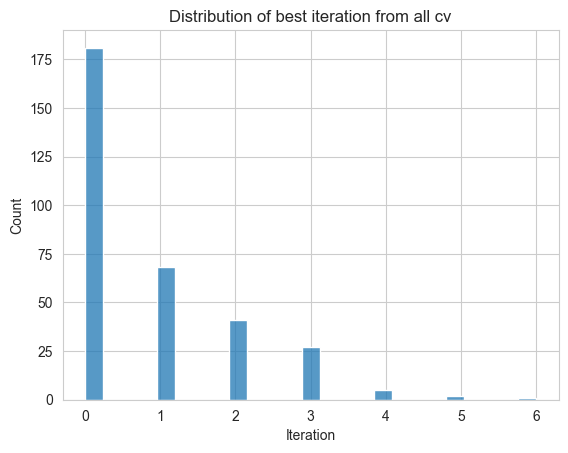

In [24]:
import seaborn as sns 
data = [2, 1, 0, 1, 0, 2, 1, 0, 0, 4, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 3, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 6, 2, 0, 5, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 3, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 3, 1, 0, 3, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 5, 1, 1, 1, 2, 0, 3, 1, 2, 0, 0, 0, 1, 3, 1, 3, 2, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 3, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 1, 0, 0, 4, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 3, 4, 1, 0, 0, 0, 0, 3]
sns.set_style('whitegrid')
sns.histplot(data, bins=25)
plt.title('Distribution of best iteration from all cv')
plt.xlabel('Iteration')

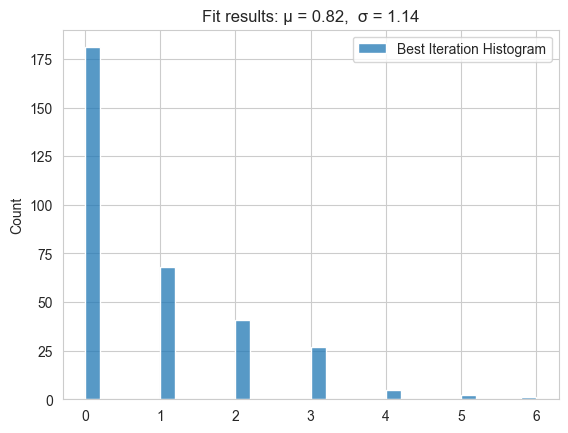

In [9]:
data = [2, 1, 0, 1, 0, 2, 1, 0, 0, 4, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 3, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 6, 2, 0, 5, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 3, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 3, 1, 0, 3, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 5, 1, 1, 1, 2, 0, 3, 1, 2, 0, 0, 0, 1, 3, 1, 3, 2, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 3, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 1, 0, 0, 4, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 3, 4, 1, 0, 0, 0, 0, 3]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge

def get_pretreatment_hamd_reduction_percentage(path='/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/prognosis/base_label.npy'):
    data = np.load(path)
    reduction_percent = (data[:,1] - data[:,0]) / data[:,0]
    return reduction_percent

def plot_hamd_distribution(hamd_data):
    # hamd_data = get_pretreatment_hamd_reduction_percentage()
    sns.set_style('whitegrid')

    # Plotting the histogram with density instead of count on y-axis
    sns.histplot(hamd_data, bins=30, kde=False, stat="count", label='Best Iteration Histogram')

    # Calculate the mean and standard deviation, which are needed to plot the normalization curve
    mu, std = norm.fit(hamd_data)

    # Plot the normalization curve
    # xmin, xmax = plt.xlim()
    # x = np.linspace(xmin, xmax, 100)
    # p = norm.pdf(x, mu, std)
    # plt.plot(x, p, 'k', linewidth=2, label='Normalization Curve')

    title = "Fit results: μ = %.2f,  σ = %.2f" % (mu, std)
    plt.title(title)

    plt.legend()
    plt.show()
plot_hamd_distribution(data)

In [27]:
from utils.fnirs_utils import normalize 
from utils.fnirs_utils import normalize_demographic
from utils.fnirs_utils import avg_every_ten_point_in_last_dimension

# time point 
data_timepoint = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pre_treatment_hamd_reduction_50/hb_data.npy')
hbo = data_timepoint[:,:,:1250]
hbo = avg_every_ten_point_in_last_dimension(hbo)
hbr = data_timepoint[:,:,1252:]
hbr = avg_every_ten_point_in_last_dimension(hbr)
hbt = hbo + hbr
hb = np.concatenate((hbo, hbr), axis=2)
hb = np.concatenate((hb, hbt), axis=2)
data_timepoint = hb
label_timepoint = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pre_treatment_hamd_reduction_50/label.npy')

# functional connectivity
data_fc = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/DMFC/pre_treatment_hamd_reduction_50/data.npy')
data_fc = data_fc.reshape(data_fc.shape[0], data_fc.shape[1], -1)
data_fc = normalize(data_fc)
label_fc = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/DMFC/pre_treatment_hamd_reduction_50/label.npy')

# selected features
data_sf = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pretreatment_benchmarks/yu_gnn/data.npy')
data_sf = np.nan_to_num(data_sf)
label_sf = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pretreatment_benchmarks/yu_gnn/label.npy')

# demographic features 
data_df = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pre_treatment_hamd_reduction_50/demographic_data.npy')
data_df = normalize_demographic(data_df)
new_data_df = np.zeros((data_df.shape[0], 52, data_df.shape[1]))
for i in range(new_data_df.shape[1]):
    new_data_df[:,i,:] = data_df
data_df = new_data_df
label_df = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pre_treatment_hamd_reduction_50/label.npy')

# print(label_timepoint == label_fc)
# print(label_timepoint == label_sf)

print('np.mean(data_timepoint) = ', np.mean(data_timepoint), ', shape -> ', data_timepoint.shape)
print('np.mean(data_fc) = ', np.mean(data_fc), ', shape -> ', data_fc.shape)
print('np.mean(data_sf) = ', np.mean(data_sf), ', shape -> ', data_sf.shape)
print('np.mean(data_df) = ', np.mean(data_df), ', shape -> ', data_df.shape)

merge_feature = np.concatenate((data_timepoint, data_fc, data_sf, data_df), axis=2)
print(merge_feature.shape)

np.save('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis/pre_treatment_hamd_reduction_50/merge_feature.npy', merge_feature) 


np.mean(data_timepoint) =  7.948919810635993e-05 , shape ->  (65, 52, 375)
np.mean(data_fc) =  1.4230259614676563e-17 , shape ->  (65, 52, 156)
np.mean(data_sf) =  -4.452570973184388e-17 , shape ->  (65, 52, 36)
np.mean(data_df) =  -8.103015598770373e-17 , shape ->  (65, 52, 11)
(65, 52, 578)


(65, 52, 11)


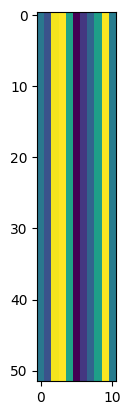

In [23]:

print(new_data_df.shape)
plt.imshow(np.mean(new_data_df,axis=0))

In [18]:
# permutation test 
def calculate_mse(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) given the actual values and predicted values.
    
    Parameters:
    actual (array-like): The actual values.
    predicted (array-like): The predicted values.
    
    Returns:
    float: The calculated MSE.
    """
    mse = np.mean((actual - predicted) ** 2)
    return mse

def permutation_test():
    data = get_pretreatment_data_percentage()
    label = get_pretreatment_hamd_reduction_percentage()
    
    # np.random.shuffle(label)
    # used the discriminative features
    
    data = data[:, indices]
    
    model = Ridge()
    model_name = 'Ridge'
    cv = 5
    
    predicted = cross_val_predict(model, data, label, cv=cv)
    
    without_permutation_mse = calculate_mse(label, predicted)
    with_permutation_mse = []
    for i in range(10000):
        np.random.shuffle(label)
        predicted = cross_val_predict(model, data, label, cv=cv)
        with_permutation_mse.append(calculate_mse(label, predicted))
    return without_permutation_mse, with_permutation_mse


    # plot_predict_true(label, predicted, model_name+f' cv={cv}')
indices = retrieve_best_indice_from_4_yu_time_feature()
without_permutation_mse, with_permutation_mse = permutation_test()


/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/scripts/ML/Complete/TimeFeature_prognosis.py:484: RuntimeWarning: divide by zero encountered in divide
  feature_skewness /= np.std(Hb, axis=2) ** 3
/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/scripts/ML/Complete/TimeFeature_prognosis.py:497: RuntimeWarning: invalid value encountered in divide
  feature_kurtosis = (n * (n + 1) * fourth_moment) / ((n - 1) * (n - 2)
/Users/shanxiafeng/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/scripts/ML/Complete/TimeFeature_prognosis.py:175: RuntimeWarning: invalid value encountered in subtract
  normalized_data[i, :] = (data[i, :] - mean) / std


Define model Decision Tree with default setting and seed 1710772829
current seed: 1710772829

| Model Name | Val/Test Set | Accuracy | Sensitivity | Specificity | F1 Score |
|------------|--------------|----------|-------------|-------------|----------|
| Decision Tree | test | 0.9077 | 0.8000 | 0.9400 | 0.8000 |

data shapa: (65, 4)


/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/utils/fnirs_utils.py:484: RuntimeWarning: divide by zero encountered in divide
  feature_skewness /= np.std(Hb, axis=2) ** 3
/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/utils/fnirs_utils.py:497: RuntimeWarning: invalid value encountered in divide
  feature_kurtosis = (n * (n + 1) * fourth_moment) / ((n - 1) * (n - 2)
/Users/shanxiafeng/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/utils/fnirs_utils.py:175: RuntimeWarning: invalid value encountered in subtract
  normalized_data[i, :] = (data[i, :] - mean) / std


In [20]:
from scipy.stats import ttest_ind
def compare_significant_difference(a, b):
    """
    Compare the significant difference between two variables using a t-test.
    
    Parameters:
    a (array-like): The first variable.
    b (array-like): The second variable.
    
    Returns:
    float: The p-value of the t-test.
    """
    _, p_value = ttest_ind(a, b)
    return p_value
print(without_permutation_mse, np.mean(with_permutation_mse), np.std(with_permutation_mse))
print(compare_significant_difference(without_permutation_mse, with_permutation_mse))

0.12864576718899076 0.15245117986573117 0.012272328367166132
0.05246013465990967


In [ ]:

plot_predict_true(all_pred, label)

In [ ]:
hbo = data[..., 0]
mean_hbo = np.mean(hbo, axis=(0,2))
plt.plot(mean_hbo)

In [18]:
from scipy.stats import zscore

path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/prognosis/pre_treatment_hamd_reduction_50/demographic_data.npy'
demo = np.load(path, allow_pickle=True)
demo = remove_nan_for_demographic_data(demo)

np.save(path, demo)

print([i for i in demo])



index: 3 value: nan
index: 3 fixed - value: 1
there should be a subject whose handedness is empty, the above steps set it to be 1
[array([40,  2,  1,  3, 16, 16,  1,  1,  0,  0,  1]), array([23,  2,  1,  1, 16,  6,  2,  0,  0,  0,  0]), array([23,  2,  1,  1, 16,  6,  2,  0,  1,  3,  1]), array([21,  1,  1,  1, 13,  5,  2,  0,  1,  4,  1]), array([29,  2,  1,  1, 16,  6,  2,  1,  1,  2,  0]), array([47,  1,  1,  3, 16,  6,  1,  0,  0,  0,  1]), array([42,  2,  1,  1, 16,  6,  1,  1,  1,  1,  0]), array([34,  1,  1,  1, 16,  6,  2,  0,  0,  0,  0]), array([38,  2,  4,  1, 16,  6,  2,  0,  1,  2,  1]), array([24,  2,  3,  3, 16,  6,  2,  0,  1,  4,  1]), array([36,  2,  2,  1, 10,  3,  2,  1,  0,  0,  0]), array([21,  1,  1,  3, 13,  5,  2,  0,  1,  3,  1]), array([22,  2,  1,  1, 16,  6,  2,  0,  1,  2,  1]), array([48,  2,  1,  1, 10,  3,  1,  0,  1,  2,  0]), array([35,  2,  2,  1, 16,  6,  1,  0,  0,  0,  0]), array([22,  2,  3,  1, 13,  5,  2,  0,  1,  2,  0]), array([23,  2,  2,  1

In [13]:
file_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/results/ML_results/AutoML/DMFC_prognosis.csv'
ref_para = 'F1_score'
def get_best_seed_from_automl(file_path, ref_para):
    data = pd.read_csv(file_path)
    max_sen = np.max(data[ref_para])
    loc_data = data[data[ref_para] == max_sen]
    print(loc_data)
    return loc_data['model'].values[0], loc_data['feature_method'].values[0], loc_data['seed'].values[0]

timefeature_prognosis = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/results/ML_results/AutoML/TimeFeature_prognosis.csv'
model_name, feature_method, seed = get_best_seed_from_automl(timefeature_prognosis, ref_para)
print(model_name, feature_method, seed)

             model feature_method        seed  accuracy  sensitivity  \
460  Decision Tree           4_yu  1710772829  0.907692          0.8   

     specificity  F1_score  total_itr para  
460         0.94       0.8         20  NaN  
Decision Tree 4_yu 1710772829


['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
(141, 52, 125, 3)


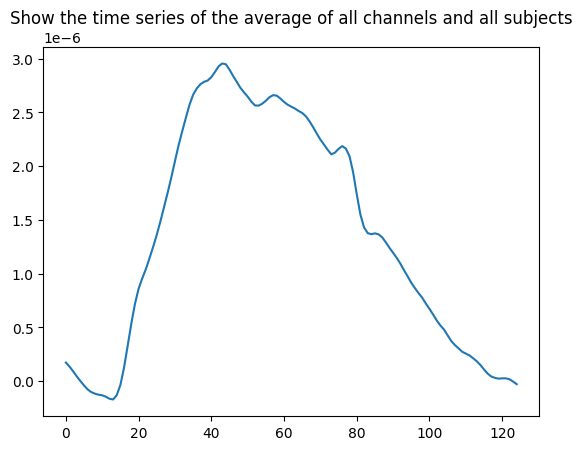

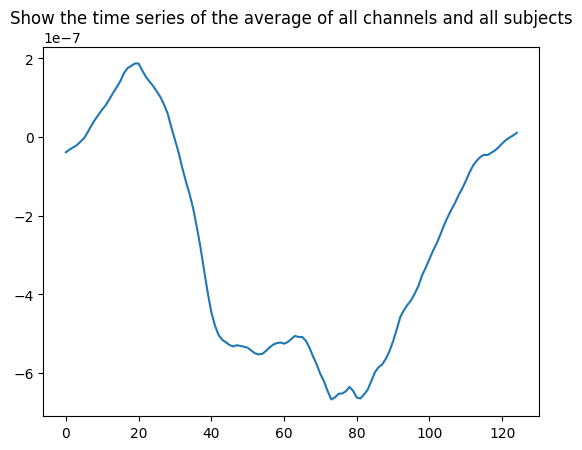

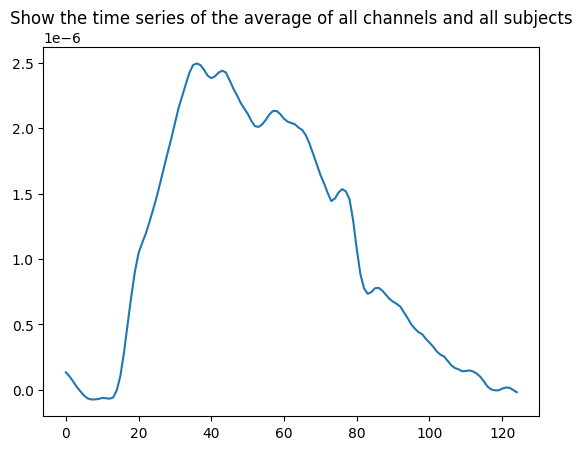

In [56]:
path_hbo = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbO.mat'
path_hbr = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbR.mat'
path_hbt = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbT.mat'

correct_channel_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/Channel_Configuration.mat'
def read_mat_file(path):
    # load data 
    data = loadmat(path)

    # load hb 
    hb = data['data_hb']

    # load label 
    label = data['label'][:,0]

    print([i for i in data])

    print(f"data shape: {hb.shape}")
    print(f"label shape: {label.shape}")

    # get the average of every 10 datapoint  
    hb = hb[..., :1250]
    print(f" Cut the shape of hb into -> {hb.shape}")

    hb = hb.reshape(hb.shape[0], hb.shape[1], 125, 10)
    print(f" Reshaping the shape of hb -> {hb.shape}")

    hb = hb.mean(axis=-1)
    print(f" Averaging the shape of hb -> {hb.shape}")
    
    plt.figure()
    plt.plot(np.mean(hb, axis=(0,1)))
    plt.title(f"Show the time series of the average of all channels and all subjects")

    return hb, label

hbo, label = read_mat_file(path_hbo)
hbr, label = read_mat_file(path_hbr)
hbt, label = read_mat_file(path_hbt)

hb = np.concatenate([hbo[..., np.newaxis], hbr[..., np.newaxis], hbt[..., np.newaxis]], axis=-1)

hb = correct_channel(hb, correct_channel_path)

print(hb.shape)

output_fold = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/dataset_514/gabrielle_num_of_sub_141'
if not os.path.exists(output_fold):
    os.makedirs(output_fold)
    
np.save(os.path.join(output_fold, 'hb_data.npy'), hb)
np.save(os.path.join(output_fold, 'label.npy'), label)

In [37]:



def change_para_base_on_file(file_path, para_name, new_value):
    para_name = para_name + '='
    # Define the path to the file
    

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Replace the value
    with open(file_path, 'w') as file:
        for line in lines:
            if 'lr=' in line:
                # Splitting the line at 'lr=' and replacing the existing value with the new value
                prefix, old_value = line.split('lr=')
                new_line = prefix + 'lr=' + new_value + ',\n'
                file.write(new_line)
            else:
                file.write(line)
                
file_path = '/Users/shanxiafeng/Desktop/test.py'
para_name = 'lr'
new_value = 0.00005
change_para_base_on_file(file_path, para_name, str(new_value))


import subprocess

bash_code = "conda activate lushair; python run.py"
subprocess.run(bash_code, shell=True)
help

text = "split\this\text"
split_text = text.split('\\')
print(split_text)
how to s